In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Credit Card Default II (balance).csv")

In [3]:
#Check for null values
df.isnull().sum()

income     0
age        0
loan       0
default    0
dtype: int64

In [4]:
#Check for negative number
df.lt(0).sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [5]:
#Replace negative age with na as it is an invalid data value
df["age"] = df.age.apply(lambda x: x if x > 0 else np.nan)

In [6]:
#Check that is is sucessfully replace with na
df.head(16)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
5,24904.06414,57.471607,15.498598,0
6,48430.35961,26.809132,5722.581981,0
7,24500.14198,32.897548,2971.003310,1
8,40654.89254,55.496853,4755.825280,0
9,25075.87277,39.776378,1409.230371,0


In [7]:
#Check that is is sucessfully replace with na
df.isnull().sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [8]:
# Check the distribution of the target variable
df['default'].value_counts()
# Data distribution shows that half will default, half will not default

1    1714
0    1714
Name: default, dtype: int64

In [9]:
X = df.loc[:,["income", "age", "loan"]]
Y = df.loc[:,["default"]]

In [10]:
# Split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
# Build the lightgbm model
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

C:\Users\kebom\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kebom\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
# Predict the results
Y_pred=model.predict(X_test)

In [13]:
# View accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))
#LightGBM Model accuracy score: 0.9922 which means the model is very highly accurate

LightGBM Model accuracy score: 0.9922


In [14]:
#Compare train and test set accuracy
Y_pred_train = model.predict(X_train)
print('Training set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

#The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

Training set accuracy score: 1.0000


In [15]:
# View confusion-matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives = ', cm[0,0])
print('\nTrue Negatives = ', cm[1,1])
print('\nFalse Positives = ', cm[0,1])
print('\nFalse Negatives = ', cm[1,0])

#Output shows that model is highly accurate

Confusion matrix

 [[527   3]
 [  5 494]]

True Positives =  527

True Negatives =  494

False Positives =  3

False Negatives =  5


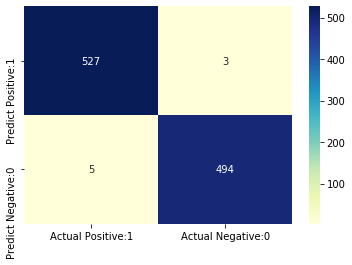

In [16]:
# Visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [17]:
#Classification metrics
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

#Model has 99% accuracy

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       530
           1       0.99      0.99      0.99       499

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029



In [18]:
#The three parameters are num_leaves, min_data_in_leaf and max_depth. They are set at default values 31, 20,-1 respectively.
#Since the model is build using LightGBM, removing outlier, normalization and removing NA, non-number and missing data is not required.


In [24]:
import joblib 

In [25]:
joblib.dump(model, "creditcarddefault2")

['creditcarddefault2']